# ANN_with_keras

# Setup

Firstly, lets import a few common modules, ensure MatplotLib plots figures inline and prepare a function to save the figures. We also check that Python 3.5 or later is installed (although Python 2.x may work, it is deprecated so we strongly recommend you use Python 3 instead), as well as Scikit-Learn ≥0.20 and TensorFlow ≥2.0.

In [4]:
# Common imports
import numpy as np
import os

In [5]:
# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)



In [3]:
# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

update  ==  conda install -c conda-forge tensorflow=2.1.0

First let's import TensorFlow and Keras.

In [4]:
import tensorflow as tf
from tensorflow import keras

In [5]:
tf.__version__

'2.3.1'

Let's start by loading the fashion MNIST dataset. Keras has a number of functions to load popular datasets in keras.datasets. The dataset is already split for you between a training set and a test set, but it can be useful to split the training set further to have a validation set:

In [6]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

The training set contains 60,000 grayscale images, each 28x28 pixels and Each pixel intensity is represented as a byte (0 to 255)::

In [7]:
X_train_full.shape

(60000, 28, 28)

In [8]:
X_train_full

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [9]:
y_train_full.shape

(60000,)

In [10]:
y_train_full

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

The testing set contains 10000 grayscale images, each 28x28 pixels:

In [11]:
X_test.shape

(10000, 28, 28)

In [12]:
y_test

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

Let's split the full training set into a validation set and a (smaller) training set.
We also scale the pixel intensities down to the 0-1 range and convert them to floats, by dividing by 255.

In [13]:
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

The validation set contains 5,000 images, and the test set contains 10,000 images:

In [14]:
X_valid.shape

(5000, 28, 28)

In [15]:
X_train.shape

(55000, 28, 28)

In [16]:
X_test.shape

(10000, 28, 28)

You can plot an image using Matplotlib's imshow() function, with a 'binary' color map:

train 

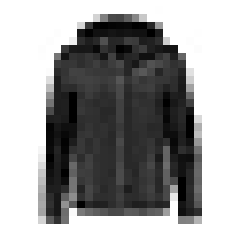

In [17]:
plt.imshow(X_train[0], cmap="binary")
plt.axis('off')
plt.show()

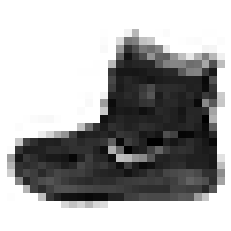

In [18]:
plt.imshow(X_valid[0], cmap="binary")
plt.axis('off')
plt.show()

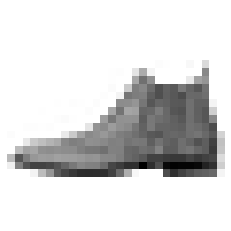

In [19]:
plt.imshow(X_test[0], cmap="binary")
plt.axis('off')
plt.show()

The labels are the class IDs (represented as uint8), from 0 to 9:

In [20]:
y_train

array([4, 0, 7, ..., 3, 0, 5], dtype=uint8)

Here are the corresponding class names:

In [21]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat","Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

So the first image in the training set is a coat:

In [22]:
class_names[y_train[0]]

'Coat'

Let's take a look at a sample of the images in the dataset:

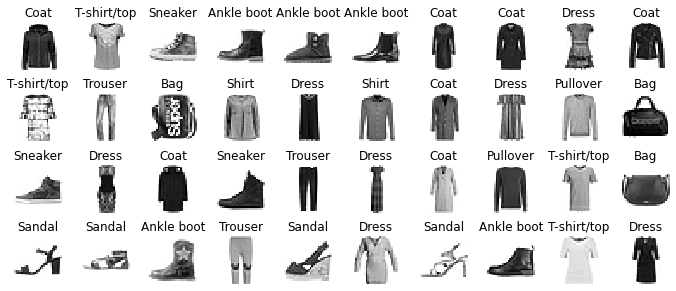

In [23]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]], fontsize=12)
plt.subplots_adjust(wspace=0.1, hspace=0.5)
plt.show()

Construct a Model

In [24]:
from IPython.display import Image 

RELU function

In [25]:
Image(url="https://intelligence-artificielle.agency/wp-content/uploads/2018/03/Capture-d’écran-2018-03-06-à-11.38.12.png")

softmax Function 

In [26]:
Image(url="https://themaverickmeerkat.com/img/softmax/sigmoid_plot.jpg")

In [27]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [28]:
keras.backend.clear_session()
np.random.seed(42)#?

In [29]:
model.layers

In [30]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [31]:
hidden1 = model.layers[1]
hidden1.name

'dense'

In [32]:
model.get_layer(hidden1.name) is hidden1

True

In [33]:
weights, biases = hidden1.get_weights()

In [34]:
weights

array([[-0.0427855 , -0.06972518,  0.04574393, ..., -0.00818197,
         0.03634868, -0.05755614],
       [-0.00960732, -0.02690683,  0.04462745, ..., -0.02583763,
         0.04891241, -0.00643145],
       [ 0.04043874, -0.01121131,  0.03473529, ...,  0.02598693,
         0.02433146,  0.01420926],
       ...,
       [-0.01275923, -0.05064012,  0.03303439, ..., -0.0003582 ,
        -0.03325404, -0.05356853],
       [-0.06559291,  0.02658858, -0.06191513, ...,  0.03885426,
         0.00651082,  0.0040051 ],
       [-0.04163707,  0.02019575, -0.02706303, ...,  0.03706825,
         0.02010994,  0.05531731]], dtype=float32)

In [35]:
weights.shape

(784, 300)

In [36]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [37]:
biases.shape

(300,)

Here you can chose the loss function, the optimizer, the performance metric, etc. 

In [38]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

Here you can chose how many epochs you need and the batch size.

In [39]:
history = model.fit(X_train, y_train, batch_size=32, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.7285 - accuracy: 0.7614 - val_loss: 0.5369 - val_accuracy: 0.8104
Epoch 2/30
1719/1719 [==============================] - 4s 3ms/step - loss: 0.4893 - accuracy: 0.8289 - val_loss: 0.4291 - val_accuracy: 0.8564
Epoch 3/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4456 - accuracy: 0.8443 - val_loss: 0.4366 - val_accuracy: 0.8526
Epoch 4/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4178 - accuracy: 0.8527 - val_loss: 0.3911 - val_accuracy: 0.8652
Epoch 5/30
1719/1719 [==============================] - 4s 3ms/step - loss: 0.3982 - accuracy: 0.8604 - val_loss: 0.3953 - val_accuracy: 0.8632
Epoch 6/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3819 - accuracy: 0.8651 - val_loss: 0.3731 - val_accuracy: 0.8678
Epoch 7/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3678 - accuracy: 0.8692 - val_loss: 0.4020 - val_accuracy:

In [40]:
history.params

{'verbose': 1, 'epochs': 30, 'steps': 1719}

In [41]:
print(history.epoch)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]


In [42]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

# Plot learning Curves

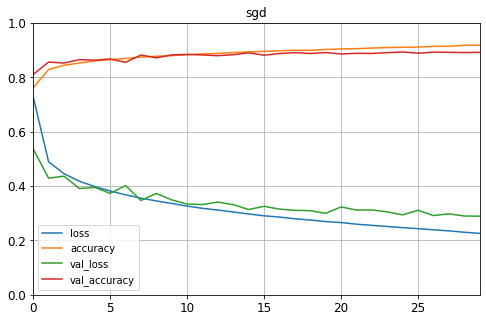

In [43]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5),title=('sgd'))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [44]:
osgd=model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3294 - accuracy: 0.8828


In [45]:
osgd

[0.32935845851898193, 0.8827999830245972]

In [46]:
osgd[0]

0.32935845851898193

In [47]:
osgd[1]

0.8827999830245972

In [48]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(5)

array([[0.0000e+00, 1.0000e-05, 4.0000e-05, 1.0000e-05, 1.0000e-05,
        2.1700e-03, 0.0000e+00, 1.4600e-02, 2.1000e-04, 9.8295e-01],
       [2.0000e-05, 0.0000e+00, 9.9901e-01, 0.0000e+00, 8.1000e-04,
        0.0000e+00, 1.6000e-04, 0.0000e+00, 0.0000e+00, 0.0000e+00],
       [1.0000e-05, 9.9999e-01, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00]],
      dtype=float32)

In [49]:
y_pred = model.predict_classes(X_new)
y_pred

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


array([9, 2, 1], dtype=int64)

In [50]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

In [51]:
y_new = y_test[:3]
y_new

array([9, 2, 1], dtype=uint8)

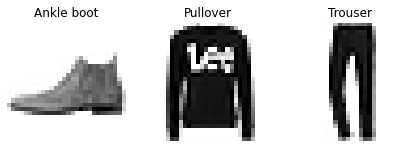

In [52]:
plt.figure(figsize=(7.2, 2.4))
for index, image in enumerate(X_new):
    plt.subplot(1, 3, index + 1)
    plt.imshow(image, cmap="binary", interpolation="nearest")
    plt.axis('off')
    plt.title(class_names[y_test[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

# EXERCICE

# 1) Plot Learning curves when using different optimizers



https://keras.io/api/optimizers/

a-optimizers:RMSprop

In [53]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="RMSprop",
              metrics=["accuracy"])

In [54]:
history1 = model.fit(X_train, y_train, batch_size=32, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4276 - accuracy: 0.8467 - val_loss: 0.4138 - val_accuracy: 0.8552
Epoch 2/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.3719 - accuracy: 0.8681 - val_loss: 0.3633 - val_accuracy: 0.8766
Epoch 3/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.3557 - accuracy: 0.8763 - val_loss: 0.4066 - val_accuracy: 0.8692
Epoch 4/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.3460 - accuracy: 0.8807 - val_loss: 0.4527 - val_accuracy: 0.8532
Epoch 5/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.3357 - accuracy: 0.8852 - val_loss: 0.3714 - val_accuracy: 0.8816
Epoch 6/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.3316 - accuracy: 0.8890 - val_loss: 0.4283 - val_accuracy: 0.8720
Epoch 7/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.3236 - accuracy: 0.8905 - val_loss: 0.4680 - val_accuracy:

In [55]:
history1.params

{'verbose': 1, 'epochs': 30, 'steps': 1719}

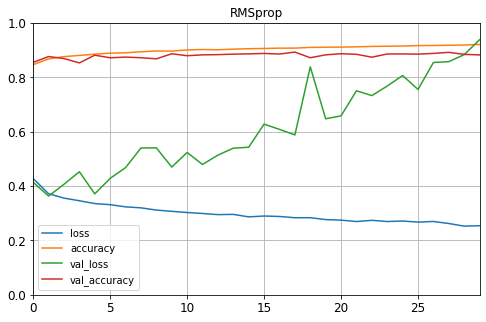

In [56]:
pd.DataFrame(history1.history).plot(figsize=(8, 5),title=('RMSprop'))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [57]:
RMSprop = model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 2ms/step - loss: 0.8423 - accuracy: 0.8737


In [58]:
RMSprop

[0.8423382639884949, 0.8737000226974487]

b-optimizers:Nadam

In [59]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="Nadam",
              metrics=["accuracy"])

In [60]:
history2 = model.fit(X_train, y_train, batch_size=32, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.2797 - accuracy: 0.9134 - val_loss: 0.5751 - val_accuracy: 0.8864
Epoch 2/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.2402 - accuracy: 0.9187 - val_loss: 0.4844 - val_accuracy: 0.8868
Epoch 3/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.2301 - accuracy: 0.9197 - val_loss: 0.5351 - val_accuracy: 0.8818
Epoch 4/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.2181 - accuracy: 0.9240 - val_loss: 0.4209 - val_accuracy: 0.8956
Epoch 5/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.2135 - accuracy: 0.9245 - val_loss: 0.4454 - val_accuracy: 0.8872
Epoch 6/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.2096 - accuracy: 0.9263 - val_loss: 0.4245 - val_accuracy: 0.8920
Epoch 7/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.2072 - accuracy: 0.9285 - val_loss: 0.4249 - val_accuracy:

In [61]:
history2.params

{'verbose': 1, 'epochs': 30, 'steps': 1719}

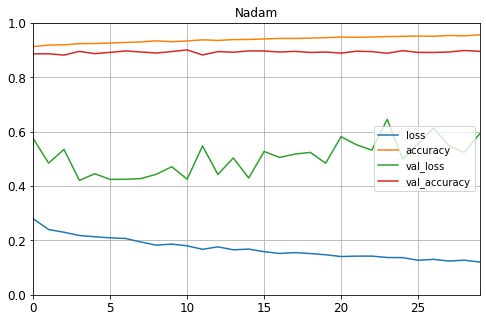

In [62]:
pd.DataFrame(history2.history).plot(figsize=(8, 5),title=('Nadam'))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [63]:
Nadam = model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.5938 - accuracy: 0.8927


In [64]:
Nadam

[0.5938175916671753, 0.8927000164985657]

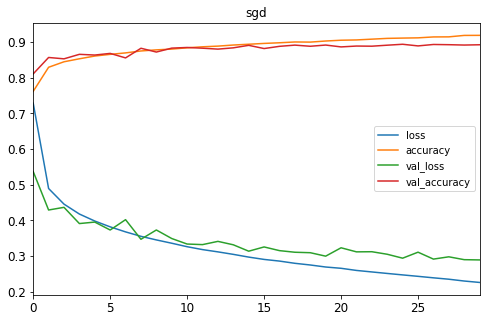

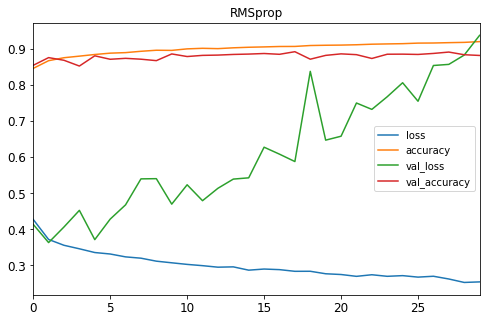

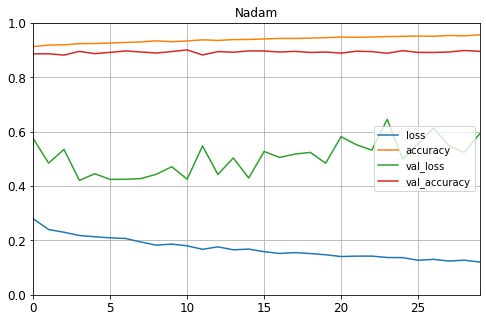

In [65]:
pd.DataFrame(history.history).plot(figsize=(8, 5),title=('sgd'))
pd.DataFrame(history1.history).plot(figsize=(8, 5),title=('RMSprop'))
pd.DataFrame(history2.history).plot(figsize=(8, 5),title=('Nadam'))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

2) Plot Learning curves when using different batch size

a-stochastic mode: where the batch size is equal to one. Therefore the gradient and the neural network parameters are updated after each sample.

batch size = 1

In [66]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [67]:
history4 = model.fit(X_train, y_train, batch_size=1, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
55000/55000 [==============================] - 102s 2ms/step - loss: 0.8702 - accuracy: 0.7147 - val_loss: 0.7154 - val_accuracy: 0.8076
Epoch 2/30
55000/55000 [==============================] - 100s 2ms/step - loss: 0.4122 - accuracy: 0.8631 - val_loss: 0.7341 - val_accuracy: 0.7826
Epoch 3/30
55000/55000 [==============================] - 94s 2ms/step - loss: 0.3257 - accuracy: 0.8889 - val_loss: 0.6215 - val_accuracy: 0.8730
Epoch 4/30
55000/55000 [==============================] - 94s 2ms/step - loss: 0.2872 - accuracy: 0.9007 - val_loss: 0.6153 - val_accuracy: 0.8484
Epoch 5/30
55000/55000 [==============================] - 93s 2ms/step - loss: 0.2683 - accuracy: 0.9093 - val_loss: 0.5361 - val_accuracy: 0.8758
Epoch 6/30
55000/55000 [==============================] - 94s 2ms/step - loss: 0.2434 - accuracy: 0.9158 - val_loss: 0.5396 - val_accuracy: 0.8922
Epoch 7/30
55000/55000 [==============================] - 93s 2ms/step - loss: 0.2185 - accuracy: 0.9227 - val_loss:

In [68]:
stochastic_mode = model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.6838 - accuracy: 0.8887


In [69]:
stochastic_mode

[0.683804452419281, 0.888700008392334]

b-mini-batch mode: where the batch size is greater than one but less than the total dataset size. Usually, a number that can be divided into the total dataset size.

batch size = 27500

In [70]:
history3 = model.fit(X_train, y_train, batch_size=27500, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
2/2 [==============================] - 1s 333ms/step - loss: 0.1194 - accuracy: 0.9565 - val_loss: 0.7079 - val_accuracy: 0.8970
Epoch 2/30
2/2 [==============================] - 0s 226ms/step - loss: 0.1192 - accuracy: 0.9566 - val_loss: 0.7076 - val_accuracy: 0.8970
Epoch 3/30
2/2 [==============================] - 0s 213ms/step - loss: 0.1190 - accuracy: 0.9567 - val_loss: 0.7073 - val_accuracy: 0.8970
Epoch 4/30
2/2 [==============================] - 0s 201ms/step - loss: 0.1187 - accuracy: 0.9567 - val_loss: 0.7071 - val_accuracy: 0.8970
Epoch 5/30
2/2 [==============================] - 0s 207ms/step - loss: 0.1185 - accuracy: 0.9568 - val_loss: 0.7068 - val_accuracy: 0.8974
Epoch 6/30
2/2 [==============================] - 0s 201ms/step - loss: 0.1183 - accuracy: 0.9567 - val_loss: 0.7066 - val_accuracy: 0.8974
Epoch 7/30
2/2 [==============================] - 0s 205ms/step - loss: 0.1181 - accuracy: 0.9567 - val_loss: 0.7064 - val_accuracy: 0.8974
Epoch 8/30
2/2 [====

In [71]:
mini_batch_mode = model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.6780 - accuracy: 0.8890


In [72]:
mini_batch_mode

[0.6780264973640442, 0.8889999985694885]

c-batch mode: where the batch size is equal to the total dataset thus making the iteration and epoch values equivalent

batch size = 30

In [73]:
#history5 = model.fit(X_train, y_train, batch_size=55000, epochs=55000,
                    #validation_data=(X_valid, y_valid))

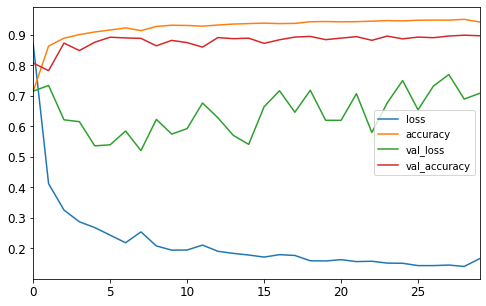

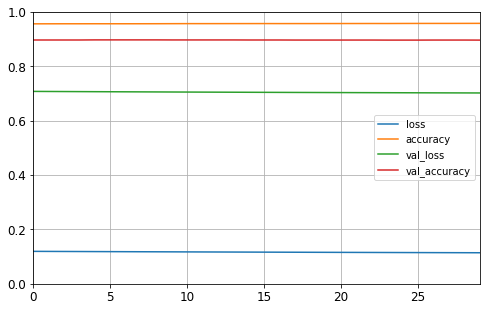

In [74]:
pd.DataFrame(history4.history).plot(figsize=(8, 5))
pd.DataFrame(history3.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

3) Plot Learning curves when using different number of epochs

a-number of epochs=5

In [75]:
history6 = model.fit(X_train, y_train, batch_size=32, epochs=5,
                    validation_data=(X_valid, y_valid))

Epoch 1/5
1719/1719 [==============================] - 5s 3ms/step - loss: 0.0961 - accuracy: 0.9652 - val_loss: 0.7397 - val_accuracy: 0.9006
Epoch 2/5
1719/1719 [==============================] - 4s 3ms/step - loss: 0.0831 - accuracy: 0.9699 - val_loss: 0.7515 - val_accuracy: 0.9008
Epoch 3/5
1719/1719 [==============================] - 5s 3ms/step - loss: 0.0794 - accuracy: 0.9711 - val_loss: 0.7643 - val_accuracy: 0.9030
Epoch 4/5
1719/1719 [==============================] - 5s 3ms/step - loss: 0.0773 - accuracy: 0.9713 - val_loss: 0.7764 - val_accuracy: 0.9030
Epoch 5/5
1719/1719 [==============================] - 5s 3ms/step - loss: 0.0759 - accuracy: 0.9722 - val_loss: 0.7919 - val_accuracy: 0.9024


In [76]:
epochs5 = model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.7554 - accuracy: 0.8975


b-number of epochs=50

In [77]:
history7 = model.fit(X_train, y_train, batch_size=32, epochs=50,
                    validation_data=(X_valid, y_valid))

Epoch 1/50
1719/1719 [==============================] - 5s 3ms/step - loss: 0.0747 - accuracy: 0.9725 - val_loss: 0.7921 - val_accuracy: 0.9022
Epoch 2/50
1719/1719 [==============================] - 5s 3ms/step - loss: 0.0737 - accuracy: 0.9728 - val_loss: 0.8018 - val_accuracy: 0.9026
Epoch 3/50
1719/1719 [==============================] - 5s 3ms/step - loss: 0.0729 - accuracy: 0.9729 - val_loss: 0.8051 - val_accuracy: 0.9016
Epoch 4/50
1719/1719 [==============================] - 4s 3ms/step - loss: 0.0720 - accuracy: 0.9735 - val_loss: 0.8144 - val_accuracy: 0.9024
Epoch 5/50
1719/1719 [==============================] - 5s 3ms/step - loss: 0.0714 - accuracy: 0.9737 - val_loss: 0.8155 - val_accuracy: 0.9012
Epoch 6/50
1719/1719 [==============================] - 6s 4ms/step - loss: 0.0708 - accuracy: 0.9741 - val_loss: 0.8226 - val_accuracy: 0.9028
Epoch 7/50
1719/1719 [==============================] - 6s 3ms/step - loss: 0.0702 - accuracy: 0.9740 - val_loss: 0.8218 - val_accuracy:

In [78]:
epochs50 = model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.9168 - accuracy: 0.8980


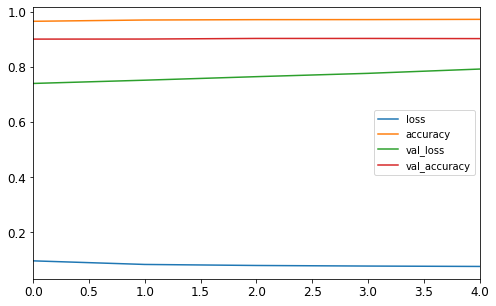

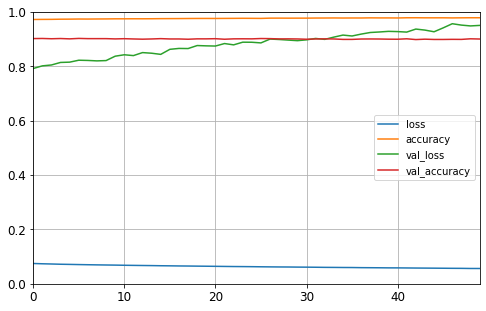

In [79]:
pd.DataFrame(history6.history).plot(figsize=(8, 5))
pd.DataFrame(history7.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

# 4) Add additional neurons and use Dropout Layer. Plot Learning curves.

Construct a Model with one dropout

In [80]:
from keras.layers import Dropout

Using TensorFlow backend.


In [81]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(500, activation="relu"))
model.add((keras.layers.Dropout(0.2)))
model.add(keras.layers.Dense(200, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))



In [82]:
#model.add(Dropout(0.2,input_shape=(60,)))

In [83]:
model.layers

In [84]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 500)               392500    
_________________________________________________________________
dropout (Dropout)            (None, 500)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 200)               100200    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                2010      
Total params: 494,710
Trainable params: 494,710
Non-trainable params: 0
_________________________________________________________________


In [85]:
hidden1 = model.layers[1]
hidden1.name

'dense'

In [86]:
weights, biases = hidden1.get_weights()

In [87]:
weights

array([[-0.01087485,  0.06447577, -0.01608268, ..., -0.01695348,
        -0.02536787,  0.03425395],
       [ 0.01717205, -0.02850194,  0.0058112 , ...,  0.01176058,
         0.03970736, -0.02281613],
       [ 0.01256752,  0.0663734 , -0.00959557, ..., -0.04442007,
        -0.05931844,  0.03440005],
       ...,
       [ 0.06086373,  0.02036492, -0.03388802, ...,  0.05842534,
        -0.00369998,  0.01514301],
       [-0.0108687 , -0.01553619,  0.0446021 , ...,  0.00742939,
        -0.01466264, -0.04836497],
       [-0.06078715, -0.00891202,  0.01242123, ..., -0.03440594,
        -0.0445056 , -0.02049035]], dtype=float32)

In [88]:
weights.shape

(784, 500)

In [89]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [90]:
biases.shape

(500,)

In [91]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [92]:
history8 = model.fit(X_train, y_train, batch_size=32, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 11s 6ms/step - loss: 0.7555 - accuracy: 0.7467 - val_loss: 0.4991 - val_accuracy: 0.8344
Epoch 2/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.5080 - accuracy: 0.8224 - val_loss: 0.4331 - val_accuracy: 0.8546
Epoch 3/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.4551 - accuracy: 0.8419 - val_loss: 0.4070 - val_accuracy: 0.8654
Epoch 4/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.4236 - accuracy: 0.8513 - val_loss: 0.3842 - val_accuracy: 0.8666
Epoch 5/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.4004 - accuracy: 0.8579 - val_loss: 0.3686 - val_accuracy: 0.8712
Epoch 6/30
1719/1719 [==============================] - 10s 6ms/step - loss: 0.3839 - accuracy: 0.8651 - val_loss: 0.3640 - val_accuracy: 0.8746
Epoch 7/30
1719/1719 [==============================] - 10s 6ms/step - loss: 0.3703 - accuracy: 0.8685 - val_loss: 0.3569 - val_accura

In [93]:
 dropl = model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 5ms/step - loss: 0.3132 - accuracy: 0.8894


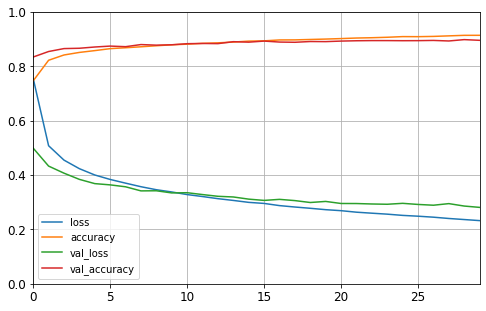

In [94]:
pd.DataFrame(history8.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

# 5) Use Batch Normalisation

In [95]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(500, activation="relu"))
model.add((keras.layers.Dropout(0.2)))
model.add(keras.layers.Dense(200, activation="relu"))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dense(10, activation="softmax"))





In [96]:
model.layers

In [97]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [98]:
history9 = model.fit(X_train, y_train, batch_size=32, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 12s 7ms/step - loss: 0.5843 - accuracy: 0.7933 - val_loss: 0.4121 - val_accuracy: 0.8538
Epoch 2/30
1719/1719 [==============================] - 11s 6ms/step - loss: 0.4350 - accuracy: 0.8458 - val_loss: 0.3585 - val_accuracy: 0.8700
Epoch 3/30
1719/1719 [==============================] - 13s 8ms/step - loss: 0.3980 - accuracy: 0.8565 - val_loss: 0.3540 - val_accuracy: 0.8728
Epoch 4/30
1719/1719 [==============================] - 11s 7ms/step - loss: 0.3700 - accuracy: 0.8663 - val_loss: 0.3675 - val_accuracy: 0.8626
Epoch 5/30
1719/1719 [==============================] - 12s 7ms/step - loss: 0.3476 - accuracy: 0.8729 - val_loss: 0.3359 - val_accuracy: 0.8772
Epoch 6/30
1719/1719 [==============================] - 11s 7ms/step - loss: 0.3334 - accuracy: 0.8775 - val_loss: 0.3120 - val_accuracy: 0.8876
Epoch 7/30
1719/1719 [==============================] - 12s 7ms/step - loss: 0.3215 - accuracy: 0.8820 - val_loss: 0.3117 - val_ac

In [99]:
BN = model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3253 - accuracy: 0.8912


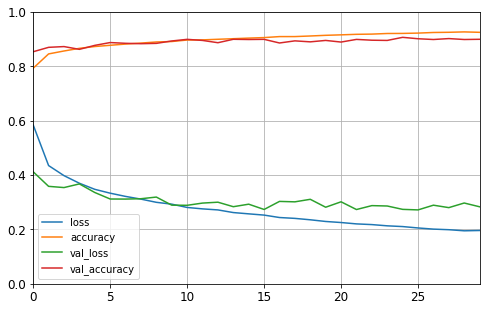

In [100]:
pd.DataFrame(history9.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

# 6) repeat with more layers

In [101]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(200, activation="relu"))
model.add((keras.layers.Dropout(0.5)))
model.add(keras.layers.Dense(150, activation="relu"))
model.add((keras.layers.Dropout(0.5)))
model.add(keras.layers.Dense(80, activation="relu"))
model.add(keras.layers.Dense(50, activation="relu"))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dense(10, activation="softmax"))



In [102]:
model.layers

In [103]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [104]:
history10 = model.fit(X_train, y_train, batch_size=32, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 5s 3ms/step - loss: 1.0899 - accuracy: 0.6057 - val_loss: 0.6345 - val_accuracy: 0.7774
Epoch 2/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.7294 - accuracy: 0.7377 - val_loss: 0.5070 - val_accuracy: 0.8272
Epoch 3/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.6352 - accuracy: 0.7726 - val_loss: 0.4457 - val_accuracy: 0.8442
Epoch 4/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.5863 - accuracy: 0.7946 - val_loss: 0.4214 - val_accuracy: 0.8538
Epoch 5/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.5508 - accuracy: 0.8071 - val_loss: 0.4208 - val_accuracy: 0.8460
Epoch 6/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.5288 - accuracy: 0.8140 - val_loss: 0.3928 - val_accuracy: 0.8586
Epoch 7/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.5085 - accuracy: 0.8212 - val_loss: 0.3864 - val_accuracy:

In [105]:
ML = model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 2ms/step - loss: 0.3695 - accuracy: 0.8720


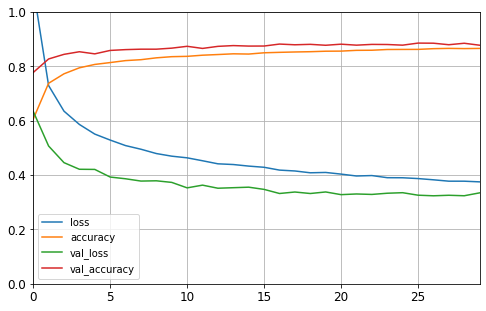

In [106]:
pd.DataFrame(history10.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

# 7) apply on different datasets

In [107]:
data = keras.datasets.mnist
(X_train_full, y_train_full), (X_test, y_test) = data.load_data()

In [108]:
X_train_full.shape

(60000, 28, 28)

In [109]:
y_train_full

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [110]:
X_valid, X_train = X_train_full[:10000] / 255., X_train_full[10000:] / 255.
y_valid, y_train = y_train_full[:10000], y_train_full[10000:]
X_test = X_test / 255.

In [111]:
y_train

array([3, 8, 7, ..., 5, 6, 8], dtype=uint8)

In [112]:
class_names = ["0", "1", "2", "3", "4","5", "6", "7", "8", "9"]

In [113]:
class_names[y_train[0]]

'3'

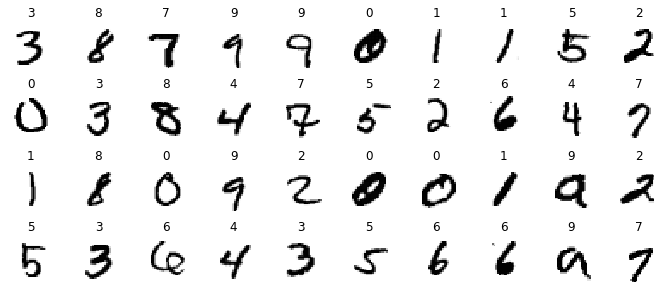

In [114]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]], fontsize=12)
plt.subplots_adjust(wspace=0.1, hspace=0.5)
plt.show()

Construct a Model

In [115]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add((keras.layers.Dropout(0.5)))
model.add(keras.layers.Dense(200, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dense(10, activation="softmax"))


In [116]:
keras.backend.clear_session()
np.random.seed(42)

In [117]:
model.layers

In [118]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 300)               235500    
_________________________________________________________________
dropout_4 (Dropout)          (None, 300)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 200)               60200     
_________________________________________________________________
dense_13 (Dense)             (None, 100)               20100     
_________________________________________________________________
batch_normalization_2 (Batch (None, 100)               400       
_________________________________________________________________
dense_14 (Dense)             (None, 10)               

In [119]:
hidden1 = model.layers[1]
hidden1.name

'dense_11'

In [120]:
model.get_layer(hidden1.name) is hidden1

True

In [121]:
weights, biases = hidden1.get_weights()

In [122]:
weights

array([[-0.04081975,  0.05720402,  0.070557  , ..., -0.04917201,
        -0.07025655,  0.0172051 ],
       [ 0.04195054, -0.06353848,  0.04525857, ...,  0.00031666,
         0.0542361 , -0.0320443 ],
       [ 0.02280384, -0.01868952, -0.06241119, ...,  0.00083815,
         0.02179063, -0.00157457],
       ...,
       [-0.07425775, -0.02616493, -0.07357869, ..., -0.03909646,
         0.00766376,  0.00645903],
       [ 0.0079017 , -0.02307434,  0.02412941, ...,  0.06647845,
        -0.06502932,  0.04125687],
       [ 0.04228248, -0.04331343, -0.0658965 , ...,  0.00246159,
        -0.07028286, -0.0615798 ]], dtype=float32)

In [123]:
weights.shape

(784, 300)

In [124]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [125]:
biases.shape

(300,)

In [126]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [127]:
historyf = model.fit(X_train, y_train, batch_size=32, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
1563/1563 [==============================] - 5s 3ms/step - loss: 0.5959 - accuracy: 0.8146 - val_loss: 0.2151 - val_accuracy: 0.9378
Epoch 2/30
1563/1563 [==============================] - 5s 3ms/step - loss: 0.3067 - accuracy: 0.9060 - val_loss: 0.1607 - val_accuracy: 0.9521
Epoch 3/30
1563/1563 [==============================] - 5s 3ms/step - loss: 0.2424 - accuracy: 0.9258 - val_loss: 0.1367 - val_accuracy: 0.9586
Epoch 4/30
1563/1563 [==============================] - 5s 3ms/step - loss: 0.2102 - accuracy: 0.9349 - val_loss: 0.1255 - val_accuracy: 0.9610
Epoch 5/30
1563/1563 [==============================] - 5s 3ms/step - loss: 0.1874 - accuracy: 0.9429 - val_loss: 0.1160 - val_accuracy: 0.9654
Epoch 6/30
1563/1563 [==============================] - 6s 4ms/step - loss: 0.1721 - accuracy: 0.9469 - val_loss: 0.1058 - val_accuracy: 0.9678
Epoch 7/30
1563/1563 [==============================] - 6s 4ms/step - loss: 0.1571 - accuracy: 0.9516 - val_loss: 0.1038 - val_accuracy:

In [128]:
ND = model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 2ms/step - loss: 0.0667 - accuracy: 0.9806


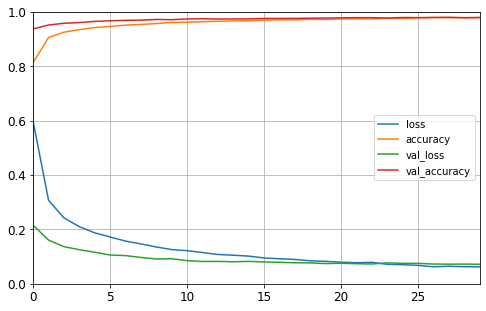

In [129]:
pd.DataFrame(historyf.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

https://keras.io/search.html?query=Batch%20Normalisation

https://keras.io/api/layers/normalization_layers/batch_normalization/
       
https://keras.io/api/layers/regularization_layers/dropout/
            
https://keras.io/guides/sequential_model/
                
https://machinelearningmastery.com/dropout-regularization-deep-learning-models-keras/

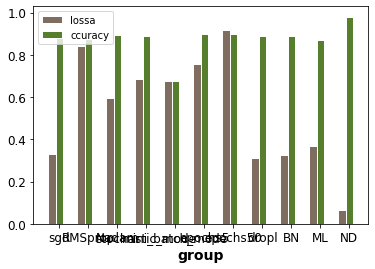

In [131]:
# libraries
import numpy as np
import matplotlib.pyplot as plt
 
# set width of bar
barWidth = 0.25
 
# set height of bar
bars1 = [osgd[0], RMSprop[0], Nadam[0], stochastic_mode[0], mini_batch_mode[0], epochs5[0], epochs50[0], dropl[0], BN[0], ML[0], ND[0]]
bars2 = [osgd[1], RMSprop[1], Nadam[1], stochastic_mode[1], mini_batch_mode[0], epochs5[1], epochs50[1], dropl[1], BN[1], ML[1], ND[1]]

 
# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
 
# Make the plot
plt.bar(r1, bars1, color='#7f6d5f', width=barWidth, edgecolor='white', label='lossa')
plt.bar(r2, bars2, color='#557f2d', width=barWidth, edgecolor='white', label='ccuracy')

 
# Add xticks on the middle of the group bars
plt.xlabel('group', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(bars1))], ['sgd', 'RMSprop', 'Nadam', 'stochastic_mode', 'mini_batch_mode','epochs5','epochs50','dropl','BN','ML','ND'])

# Create legend & Show graphic
plt.legend()
plt.show()
